In this notebook, kdsts obtained with the same IC versions (IC-testprod), but with different irene configuration parameters are compared

In [1]:
import os
import pandas as pd
import functools
import time
from collections import namedtuple
import math
from   invisible_cities.reco.dst_functions     import load_xy_corrections

import numpy             as np
import tables            as tb
import pandas            as pd
#import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib import pyplot
from pylab import xticks

import invisible_cities.core.core_functions as coref
import invisible_cities.core.fit_functions  as fitf
import invisible_cities.reco.dst_functions  as dstf
import invisible_cities.io  .dst_io         as dstio
import invisible_cities.reco.corrections    as corrf
import invisible_cities.io  .hits_io        as hstio

from  invisible_cities.io.pmaps_io import load_pmaps_as_df
from  invisible_cities.io.pmaps_io import load_pmaps
from  invisible_cities.io.pmaps_io import s2s_from_df

from scipy.optimize import curve_fit

import invisible_cities.icaro.hst_functions as hsti
# Import JAH's improved hst functions for now, to allow for statistics boxes in histograms.
# Idea is that something like this will be imported in invisible_cities in the future.

import myhst_functions as hst

# Import alpha selection functions
#import AlphaSelectionFunctions as asf

plt.style.available
#plt.style.use('seaborn-white')
plt.style.use('seaborn-talk')

optStat = True

%load_ext autoreload
%autoreload 2
%matplotlib inline

## IC testprod

In [8]:
cont = 0
frames = []
for i in range(0, 1000):
    if i%200==0: print(i)
    file_testprod  = '/home/ausonandres/maps_analysis/Kr_lt/IC_issue/6971/testprod/kdsts_6971_{0:04d}.h5'.format(i)
    file_testprodp = '/home/ausonandres/maps_analysis/Kr_lt/IC_issue/6971/testprod-p/kdsts_6971_{0:04d}.h5'.format(i)
    if os.path.exists(file_testprod):       
        if os.path.exists(file_testprodp):
            dst = dstf.load_dst(file_testprod, "DST", "Events")
            if len(dst)!=0:
                frames.append(dst)
                cont = cont + 1
print(cont)
kdst_testprod = pd.concat(frames, ignore_index=True)
#store = pd.HDFStore('/home/ausonandres/maps_analysis/Kr_lt/IC_issue/6971/canfranc/kdst_6971_canfranc.hdf5', "w", complib=str("zlib"), complevel=4)
#store.put('dataframe', kdst_canfranc, format='table', data_columns=True)
#store.close() 

0
200
400
600
800
1000


In [24]:
kdst_testprod = pd.read_hdf('/home/ausonandres/maps_analysis/Kr_lt/IC_issue/6971/testprod/kdst_6971_testprod.hdf5')

## IC testprod-p

In [4]:
cont = 0
frames = []
for i in range(0, 1000):
    if i%200==0: print(i)
    file_testprod  = '/home/ausonandres/maps_analysis/Kr_lt/IC_issue/6971/testprod/kdsts_6971_{0:04d}.h5'.format(i)
    file_testprodp = '/home/ausonandres/maps_analysis/Kr_lt/IC_issue/6971/testprod-p/kdsts_6971_{0:04d}.h5'.format(i)
    if os.path.exists(file_testprod):       
        if os.path.exists(file_testprodp):
            dst = dstf.load_dst(file_testprodp, "DST", "Events")
            frames.append(dst)
            cont = cont + 1
print(cont)
kdst_testprodp = pd.concat(frames, ignore_index=True)
store = pd.HDFStore('/home/ausonandres/maps_analysis/Kr_lt/IC_issue/6971/testprod-p/kdst_6971_testprodp.hdf5', "w", complib=str("zlib"), complevel=4)
store.put('dataframe', kdst_testprodp, format='table', data_columns=True)
store.close() 

0
200
400
600
800
1000


In [25]:
kdst_testprodp = pd.read_hdf('/home/ausonandres/maps_analysis/Kr_lt/IC_issue/6971/testprod-p/kdst_6971_testprodp.hdf5')

### Comparison

In [26]:
print('NUMBER OF EVENTS:')
print('testprod:   ', kdst_testprod .event.nunique())
print('testprod-p: ', kdst_testprodp.event.nunique())

NUMBER OF EVENTS:
testprod:    273787
testprod-p:  274188


Some events appear in the testprod-p distribution (much less than in the IC comparison (3300))

In [27]:
kdst_testprodp.event.nunique()-kdst_testprod .event.nunique()

401

### Distributions

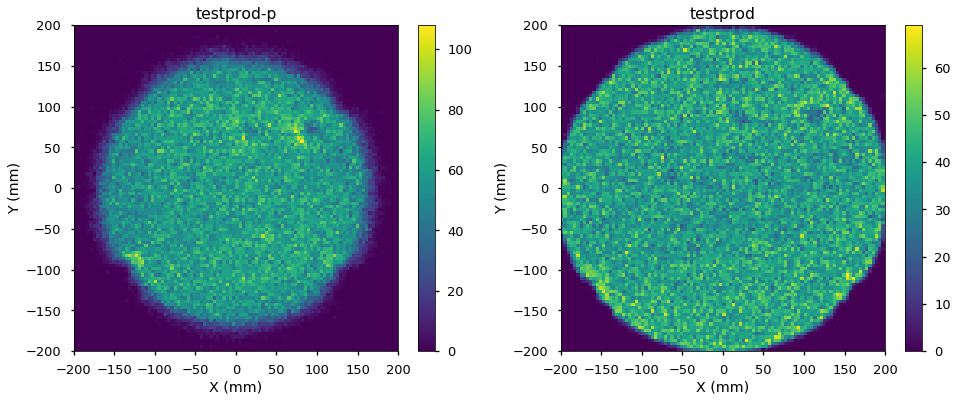

In [28]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.hist2d(kdst_testprodp.X, kdst_testprodp.Y, 100, range=[[-200,200],[-200,200]])
plt.xlabel('X (mm)');
plt.colorbar();
plt.ylabel('Y (mm)');
plt.title('testprod-p');
plt.subplot(1,2,2);
plt.hist2d(kdst_testprod.X, kdst_testprod.Y, 100, range=[[-200,200],[-200,200]])
plt.colorbar();
plt.xlabel('X (mm)');
plt.ylabel('Y (mm)');
plt.title('testprod');

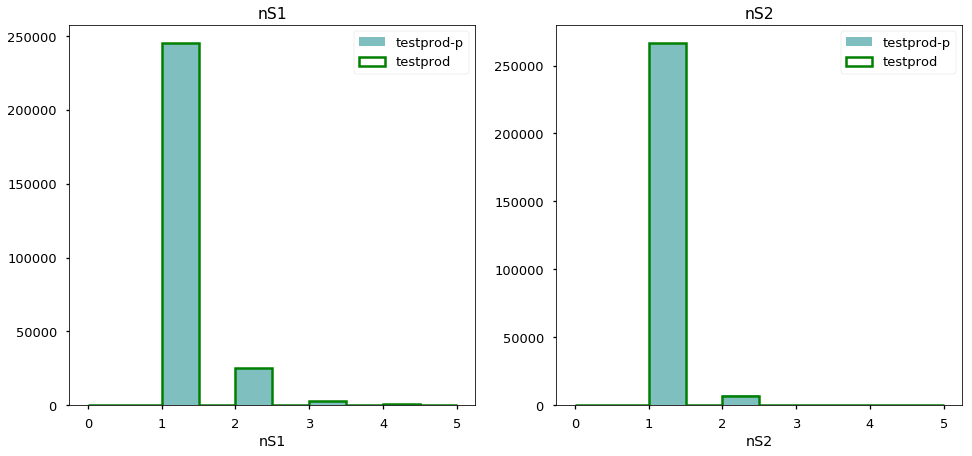

In [29]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.hist(kdst_testprodp[(kdst_testprodp.s1_peak==0)&(kdst_testprodp.s2_peak==0)].nS1, 10, (0,5), color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod [(kdst_testprod .s1_peak==0)&(kdst_testprod .s2_peak==0)].nS1, 10, (0,5), color='green', label='testprod', histtype='step', linewidth=2.5)
plt.legend();
plt.xlabel('nS1');
plt.title('nS1');

plt.subplot(1,2,2);
plt.hist(kdst_testprodp[(kdst_testprodp.s1_peak==0)&(kdst_testprodp.s2_peak==0)].nS2, 10, (0,5), color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod [(kdst_testprod .s1_peak==0)&(kdst_testprod .s2_peak==0)].nS2, 10, (0,5), color='green', label='testprod', histtype='step', linewidth=2.5)
plt.legend();
plt.xlabel('nS2');
plt.title('nS2');

the nS1 and nS2 distributions are similar

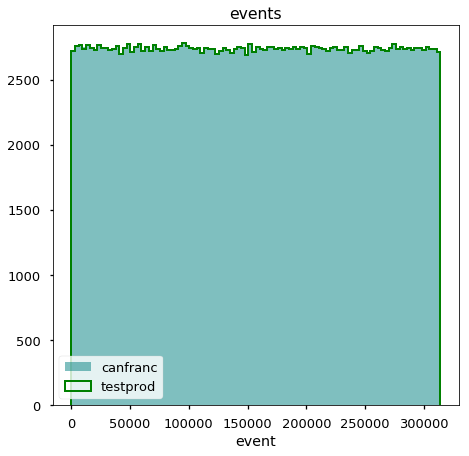

In [30]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.hist(kdst_testprodp[(kdst_testprodp.s1_peak==0)&(kdst_testprodp.s2_peak==0)].event, 100, color='teal' , label='canfranc', alpha=0.5)
plt.hist(kdst_testprod [(kdst_testprod. s1_peak==0)&(kdst_testprod. s2_peak==0)].event, 100, color='green', label='testprod', histtype='step', linewidth=2)
plt.legend(loc='lower left');
plt.xlabel('event');
plt.title('events');

In [33]:
events_testprodp = kdst_testprodp.event.unique()
events_testprod  = kdst_testprod .event.unique()

In [34]:
mask = kdst_testprodp.event.isin(kdst_testprod.event)
mask = np.logical_not(mask)

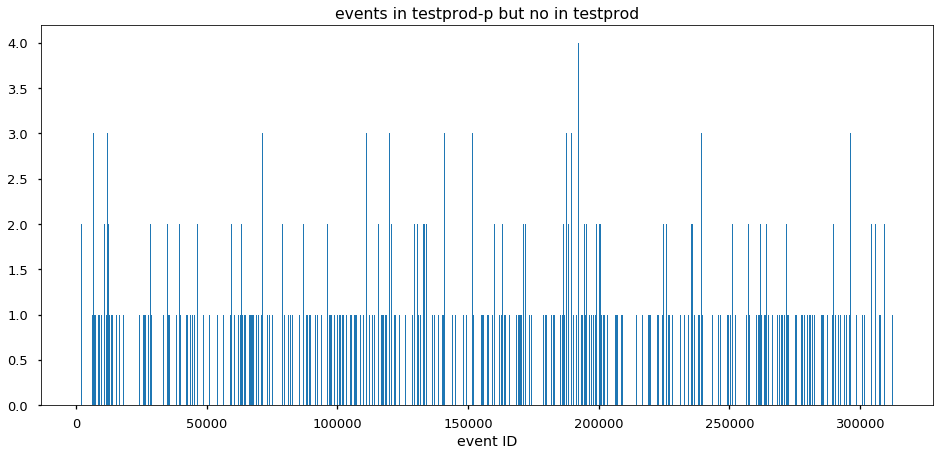

In [35]:
plt.figure(figsize=(16,7));
plt.hist(kdst_testprodp.event[mask].unique(), 1000);
plt.xlabel('event ID');
plt.title('events in testprod-p but no in testprod');

In [36]:
kdst_testprodp_sel = kdst_testprodp[mask]

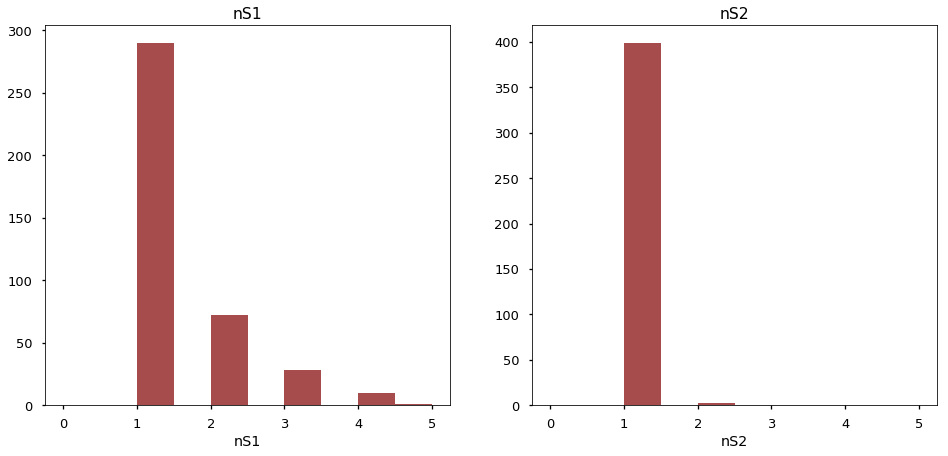

In [37]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.hist(kdst_testprodp_sel[(kdst_testprodp_sel.s1_peak==0)&(kdst_testprodp_sel.s2_peak==0)].nS1, 10, (0,5), color='maroon' , label='canfranc', alpha=0.7)
plt.xlabel('nS1');
plt.title('nS1');

plt.subplot(1,2,2);
plt.hist(kdst_testprodp_sel[(kdst_testprodp_sel.s1_peak==0)&(kdst_testprodp_sel.s2_peak==0)].nS2, 10, (0,5), color='maroon' , label='canfranc', alpha=0.7)
plt.xlabel('nS2');
plt.title('nS2');

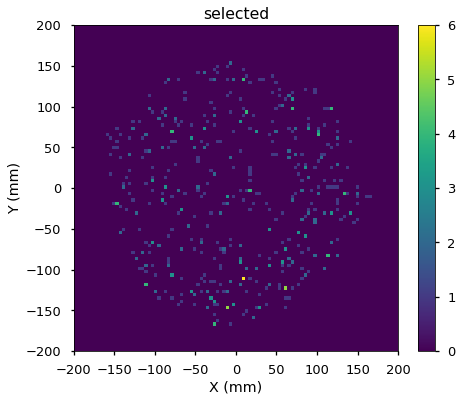

In [38]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.hist2d(kdst_testprodp_sel.X, kdst_testprodp_sel.Y, 100, range=[[-200,200],[-200,200]])
plt.xlabel('X (mm)');
plt.colorbar();
plt.ylabel('Y (mm)');
plt.title('selected');

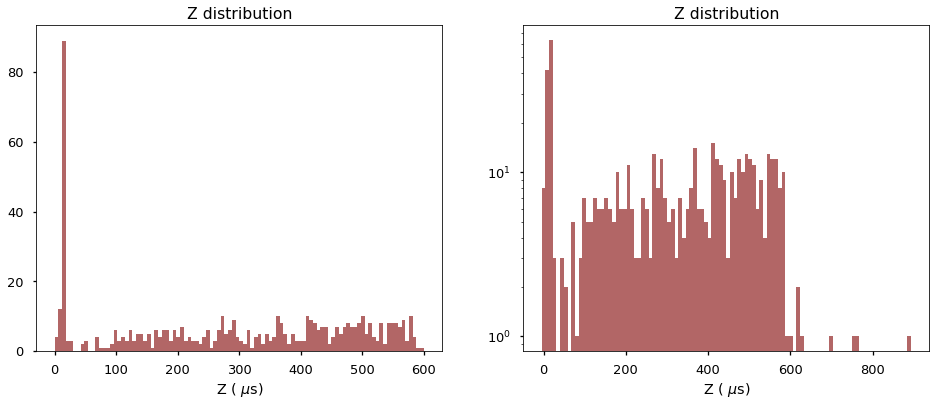

In [39]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.hist(kdst_testprodp_sel.Z, 100, (0,600), color='maroon' , label='canfranc', alpha=0.6)
plt.xlabel('Z ( $\mu$s)');
plt.title('Z distribution');
plt.subplot(1,2,2);
plt.hist(kdst_testprodp_sel.Z, 100, color='maroon' , label='canfranc', alpha=0.6)
plt.yscale('log');
plt.xlabel('Z ( $\mu$s)');
plt.title('Z distribution');

selection of nS1 and nS2

In [40]:
kdst_testprodp2 = kdst_testprodp[kdst_testprodp.nS1==1]
kdst_testprod2  = kdst_testprod [kdst_testprod .nS1==1]
print('nS1==1 eff:')
print('testprod-p: ', kdst_testprodp2.event.nunique()/kdst_testprodp.event.nunique())
print('testprod:   ', kdst_testprod2 .event.nunique()/kdst_testprod. event.nunique())

nS1==1 eff:
testprod-p:  0.8949771689497716
testprod:    0.8952287727320873


In [41]:
print('nS1==2 eff:')
print('testprod-p: ', kdst_testprodp2[kdst_testprodp2.nS2==1].event.nunique()/kdst_testprodp2.event.nunique())
print('testprod:   ', kdst_testprod2 [kdst_testprod2 .nS2==1].event.nunique()/kdst_testprod2 .event.nunique())
kdst_testprodp2 = kdst_testprodp2[kdst_testprodp2.nS1==1]
kdst_testprod2  = kdst_testprod2 [kdst_testprod2 .nS1==1]

nS1==2 eff:
testprod-p:  0.9808306709265175
testprod:    0.9817626947148534


In [42]:
kdst_testprodp = kdst_testprodp2
kdst_testprod  = kdst_testprod2

In [45]:
print('NUMBER OF EVENTS:')
print('testprod:   ', kdst_testprod.event.nunique())
print('testprod-p: ', kdst_testprodp.event.nunique())

NUMBER OF EVENTS:
testprod:    245102
testprod-p:  245392


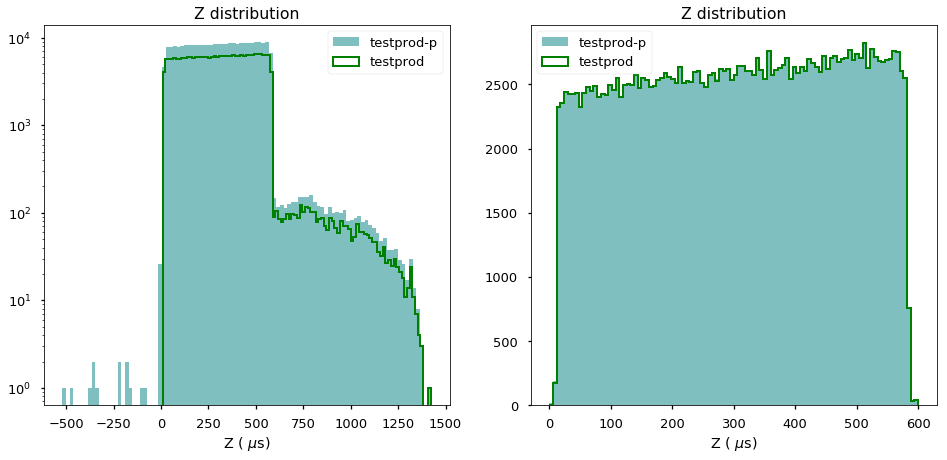

In [46]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.hist(kdst_testprodp2.Z, 100, color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod2 .Z, 100, color='green', label='testprod', histtype='step', linewidth=2)
plt.legend();
plt.yscale('log');
plt.xlabel('Z ( $\mu$s)');
plt.title('Z distribution');

plt.subplot(1,2,2);
plt.hist(kdst_testprodp2.Z, 100, (0,600), color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod2 .Z, 100, (0,600), color='green', label='testprod', histtype='step', linewidth=2)
plt.legend();
plt.xlabel('Z ( $\mu$s)');
plt.title('Z distribution');

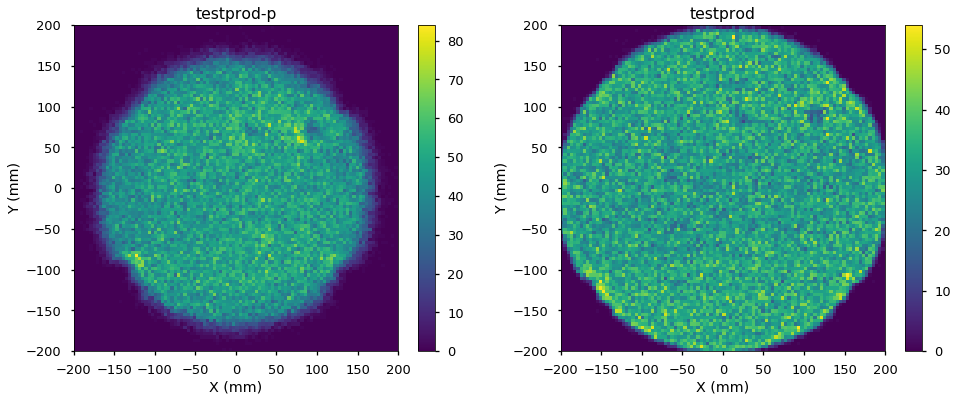

In [47]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.hist2d(kdst_testprodp2.X, kdst_testprodp2.Y, 100, range=[[-200,200],[-200,200]])
plt.xlabel('X (mm)');
plt.colorbar();
plt.ylabel('Y (mm)');
plt.title('testprod-p');
plt.subplot(1,2,2);
plt.hist2d(kdst_testprod2.X, kdst_testprod2.Y, 100, range=[[-200,200],[-200,200]])
plt.colorbar();
plt.xlabel('X (mm)');
plt.ylabel('Y (mm)');
plt.title('testprod');

significant different in the amount of events near the borders

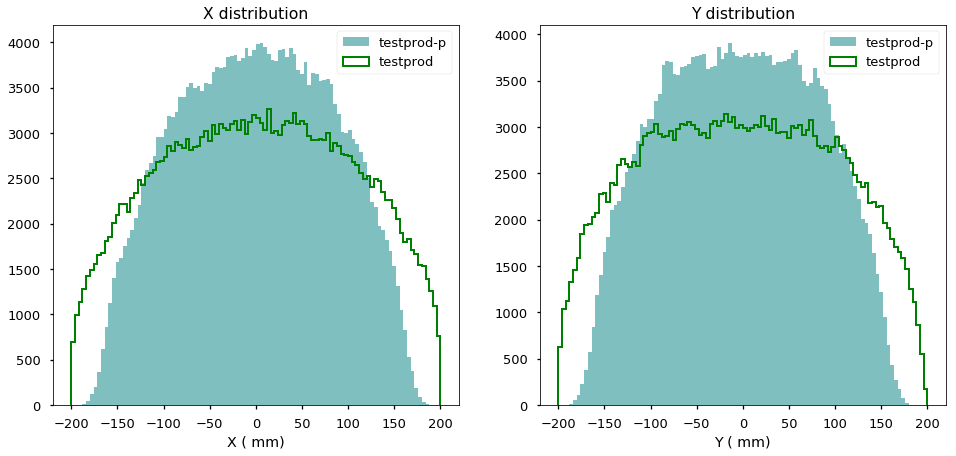

In [48]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.hist(kdst_testprodp2.X, 100, (-200,200), color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod2.X, 100, (-200,200), color='green', label='testprod', histtype='step', linewidth=2)
plt.legend();
plt.xlabel('X ( mm)');
plt.title('X distribution');

plt.subplot(1,2,2);
plt.hist(kdst_testprodp2.Y, 100, (-200,200), color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod2.Y, 100, (-200,200), color='green', label='testprod', histtype='step', linewidth=2)
plt.legend();
plt.xlabel('Y ( mm)');
plt.title('Y distribution');

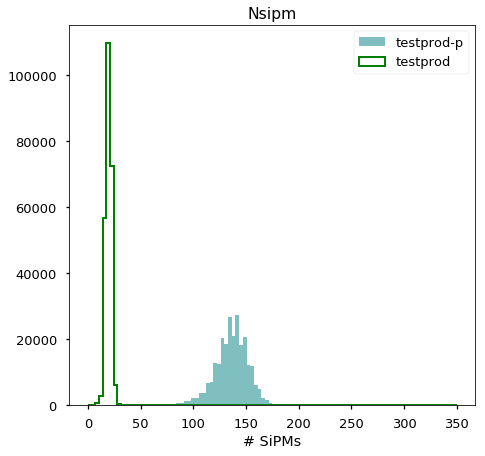

In [49]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.hist(kdst_testprodp2.Nsipm, 100, (0,350), color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod2 .Nsipm, 100, (0,350), color='green', label='testprod', histtype='step', linewidth=2)
plt.legend();
plt.xlabel('# SiPMs');
plt.title('Nsipm');

the amount of SiPMs has increased noticeably with new parameters

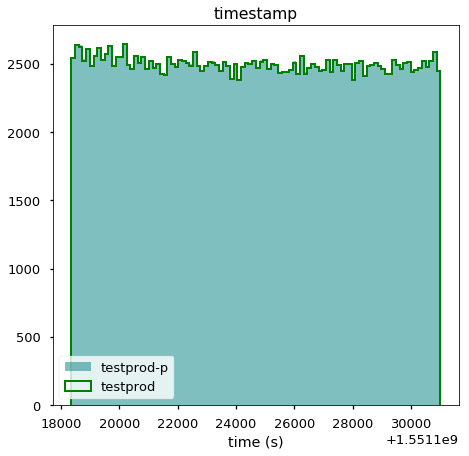

In [50]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.hist(kdst_testprodp2.time, 100, color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod2 .time, 100, color='green', label='testprod', histtype='step', linewidth=2)
plt.legend(loc='lower left');
plt.xlabel('time (s)');
plt.title('timestamp');

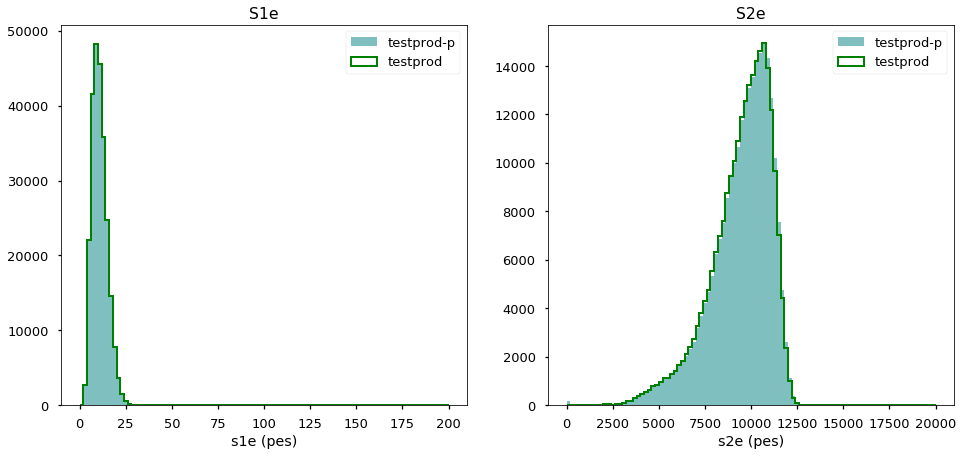

In [51]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.hist(kdst_testprodp2.S1e, 100, (0,200), color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod2 .S1e, 100, (0,200), color='green', label='testprod', histtype='step', linewidth=2)
plt.legend();
#plt.yscale('log');
plt.xlabel('s1e (pes)');
plt.title('S1e');
plt.subplot(1,2,2);
plt.hist(kdst_testprodp2.S2e, 100, (0,20000), color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod2 .S2e, 100, (0,20000), color='green', label='testprod', histtype='step', linewidth=2)
plt.legend();
#plt.yscale('log');
plt.xlabel('s2e (pes)');
plt.title('S2e');

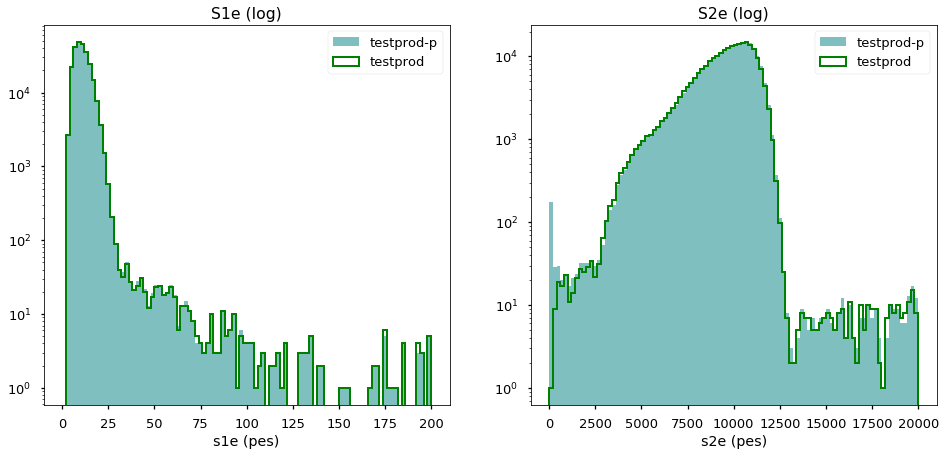

In [63]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.hist(kdst_testprodp2.S1e, 100, (0,200), color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod2 .S1e, 100, (0,200), color='green', label='testprod', histtype='step', linewidth=2)
plt.legend();
plt.yscale('log');
plt.xlabel('s1e (pes)');
plt.title('S1e (log)');
plt.subplot(1,2,2);
plt.hist(kdst_testprodp2.S2e, 100, (0,20000), color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod2 .S2e, 100, (0,20000), color='green', label='testprod', histtype='step', linewidth=2)
plt.legend();
plt.yscale('log');
plt.xlabel('s2e (pes)');
plt.title('S2e (log)');

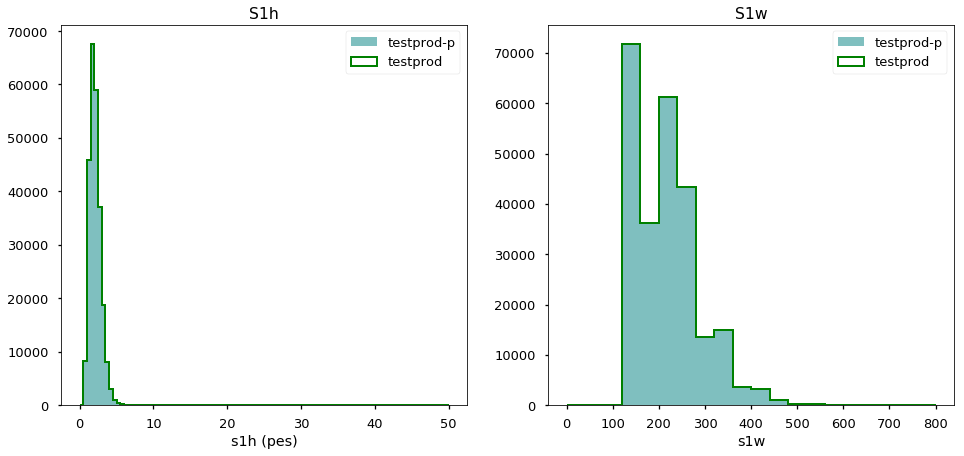

In [52]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.hist(kdst_testprodp2.S1h, 100, (0,50), color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod2 .S1h, 100, (0,50), color='green', label='testprod', histtype='step', linewidth=2)
plt.legend();
plt.xlabel('s1h (pes)');
plt.title('S1h');
plt.subplot(1,2,2);
plt.hist(kdst_testprodp2.S1w, 20, (0,800), color='teal' , label='testprod-p', alpha=0.5)
plt.hist(kdst_testprod2 .S1w, 20, (0,800), color='green', label='testprod', histtype='step', linewidth=2)
plt.legend();
plt.xlabel('s1w');
plt.title('S1w');

## Fiducial selection

In [53]:
kdst_testprodp_fid = kdst_testprodp2[kdst_testprodp2.R<180]
kdst_testprod_fid  = kdst_testprod2 [kdst_testprod2 .R<180]
print('R<180 eff:')
print('testprod-p: ', kdst_testprodp_fid.event.nunique()/kdst_testprodp2.event.nunique())
print('testprod  : ', kdst_testprod_fid .event.nunique()/kdst_testprod2. event.nunique())

R<180 eff:
testprod-p:  0.9971311208189346
testprod  :  0.7900465928470596


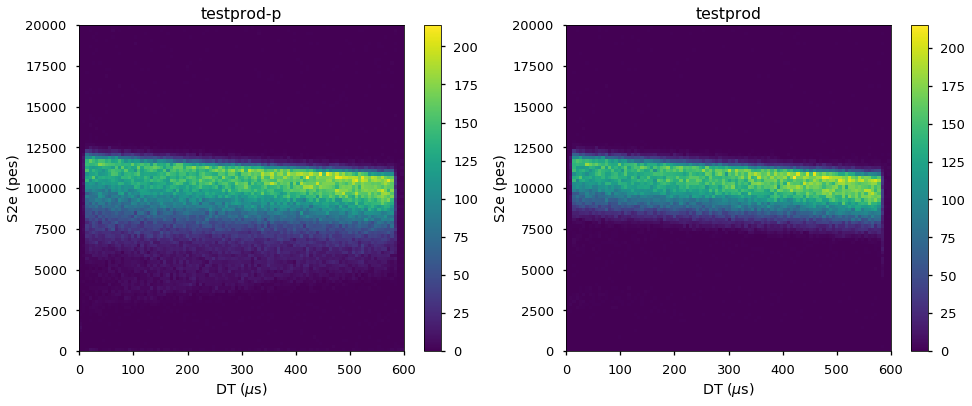

In [54]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.hist2d(kdst_testprodp_fid.Z, kdst_testprodp_fid.S2e, 100, range=[[0,600],[0,20000]])
plt.xlabel('DT ($\mu$s)');
plt.colorbar();
plt.ylabel('S2e (pes)');
plt.title('testprod-p');
plt.subplot(1,2,2);
plt.hist2d(kdst_testprod_fid.Z, kdst_testprod_fid.S2e, 100, range=[[0,600],[0,20000]])
plt.colorbar();
plt.xlabel('DT ($\mu$s)');
plt.ylabel('S2e (pes)');
plt.title('testprod');

### Time evolution

In [64]:
evol_testprodp = pd.read_hdf('/home/ausonandres/maps_analysis/Kr_lt/6971_testprod-p_/Time_evolution_testprod-p_6971.h5')
evol_testprod  = pd.read_hdf('/home/ausonandres/maps_analysis/Kr_lt/6971_testprod_/Time_evolution_testprod_6971.h5')

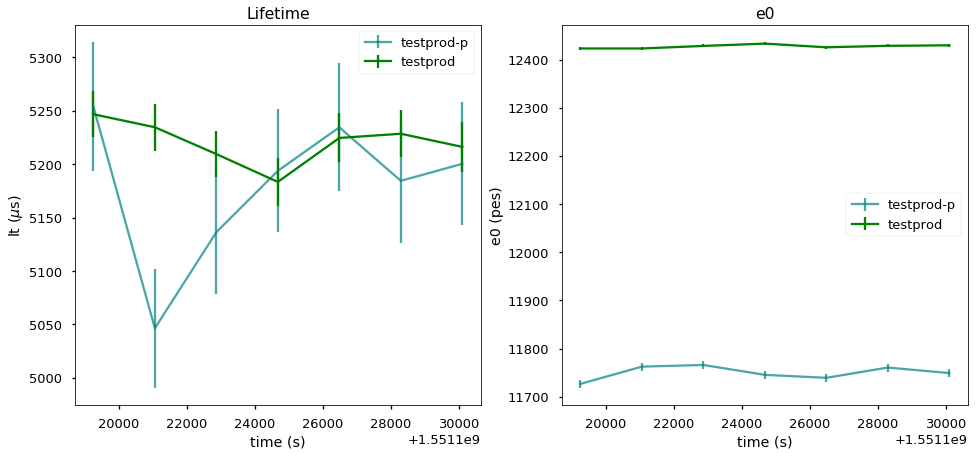

In [65]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.errorbar(evol_testprodp.time, evol_testprodp['lt'], evol_testprodp.elt, color='teal' , label='testprod-p', alpha=0.7)
plt.errorbar(evol_testprod.time, evol_testprod['lt'], evol_testprod.elt, color='green' , label='testprod')
plt.legend();
plt.xlabel('time (s)');
plt.ylabel('lt ($\mu$s)');
plt.title('Lifetime');
plt.subplot(1,2,2);
plt.errorbar(evol_testprodp.time, evol_testprodp.e0, evol_testprodp.ee0, color='teal' , label='testprod-p', alpha=0.7)
plt.errorbar(evol_testprod.time, evol_testprod.e0, evol_testprod.ee0, color='green' , label='testprod')
plt.legend();
plt.xlabel('time (s)');
plt.ylabel('e0 (pes)');
plt.title('e0');

lower e0 values, due to the fact that there are more events with lower energy with new parameters

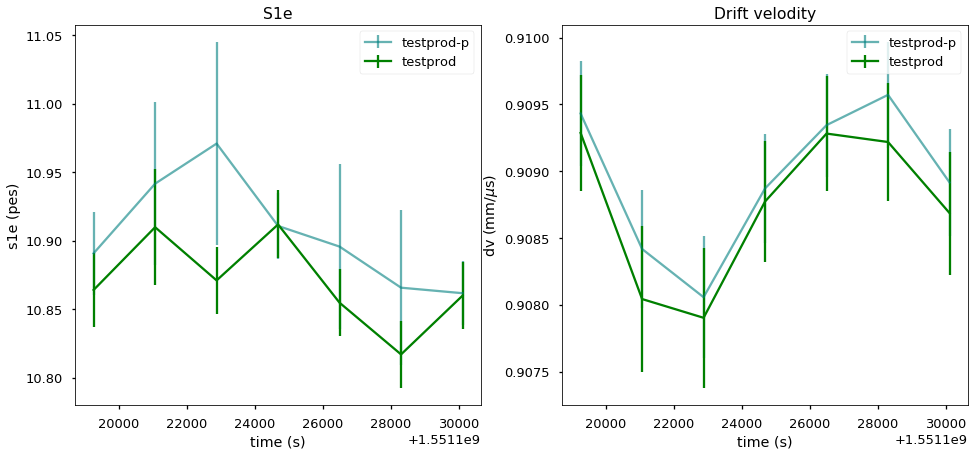

In [66]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.errorbar(evol_testprodp.time, evol_testprodp.s1e, evol_testprodp.es1e, color='teal' , label='testprod-p', alpha=0.6)
plt.errorbar(evol_testprod.time, evol_testprod.s1e, evol_testprod.es1e, color='green' , label='testprod')
plt.legend();
plt.xlabel('time (s)');
plt.ylabel('s1e (pes)');
plt.title('S1e');
plt.subplot(1,2,2);
plt.errorbar(evol_testprodp.time, evol_testprodp.dv, evol_testprodp.edv, color='teal' , label='testprod-p', alpha=0.6)
plt.errorbar(evol_testprod.time, evol_testprod.dv, evol_testprod.edv, color='green' , label='testprod')
plt.legend();
plt.xlabel('time (s)');
plt.ylabel('dv (mm/$\mu$s)');
plt.title('Drift velodity');

## Maps

In [67]:
run_number = 6971

### Geometric map

testprod-p

In [108]:
corrections_testprodp_file = '/home/ausonandres/maps_analysis/Kr_lt/6971_testprod-p_/corrections_run6971_testprod-p.h5'.format(run_number)
print(corrections_testprodp_file)
dst  = dstio.load_dst(corrections_testprodp_file, group = "XYcorrections", node = "Egeometry")
x_axis = dst.x
y_axis = dst.y
rad = np.sqrt(pow(x_axis,2)+pow(y_axis,2))
factor_testprodp = dst.factor
factor_testprodp[dst.factor==0] = 1

factor_testprodp_err_rel = dst.uncertainty
factor_testprodp_err = factor_testprodp_err_rel/dst.factor*100

/home/ausonandres/maps_analysis/Kr_lt/6971_testprod-p_/corrections_run6971_testprod-p.h5


/home/ausonandres/miniconda3/envs/IC-3.7-2018-11-07/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


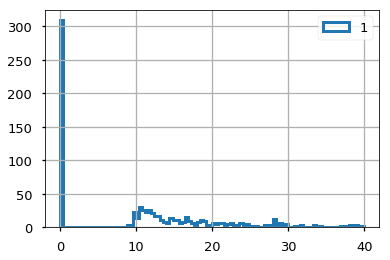

In [70]:
#plt.hist(dst.uncertainty, 100, (0, 4000), histtype='step', linewidth=3, label='1');
plt.hist(dst.uncertainty/dst.factor*100, 100, (0, 40), histtype='step', linewidth=3, label='1');
#plt.hist(factor_bg_err, 100, (0, 50), label='2');
plt.legend();
plt.grid(True)

testprod

In [109]:
corrections_testprod_file = '/home/ausonandres/maps_analysis/Kr_lt/6971_testprod_/corrections_run6971_testprod.h5'.format(run_number)
print(corrections_testprod_file)
dst  = dstio.load_dst(corrections_testprod_file, group = "XYcorrections", node = "Egeometry")
x_axis = dst.x
y_axis = dst.y
rad = np.sqrt(pow(x_axis,2)+pow(y_axis,2))
factor_testprod = dst.factor
factor_testprod[dst.factor==0] = 1

factor_testprod_err_rel = dst.uncertainty
factor_testprod_err = factor_testprod_err_rel/dst.factor*100

/home/ausonandres/maps_analysis/Kr_lt/6971_testprod_/corrections_run6971_testprod.h5


/home/ausonandres/miniconda3/envs/IC-3.7-2018-11-07/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


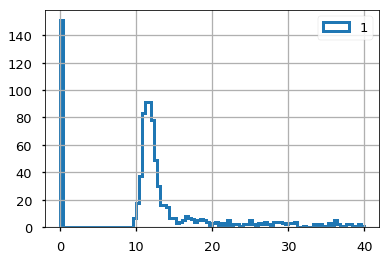

In [110]:
#plt.hist(dst.uncertainty, 100, (0, 4000), histtype='step', linewidth=3, label='1');
plt.hist(dst.uncertainty/dst.factor*100, 100, (0, 40), histtype='step', linewidth=3, label='1');
#plt.hist(factor_bg_err, 100, (0, 50), label='2');
plt.legend();
plt.grid(True)

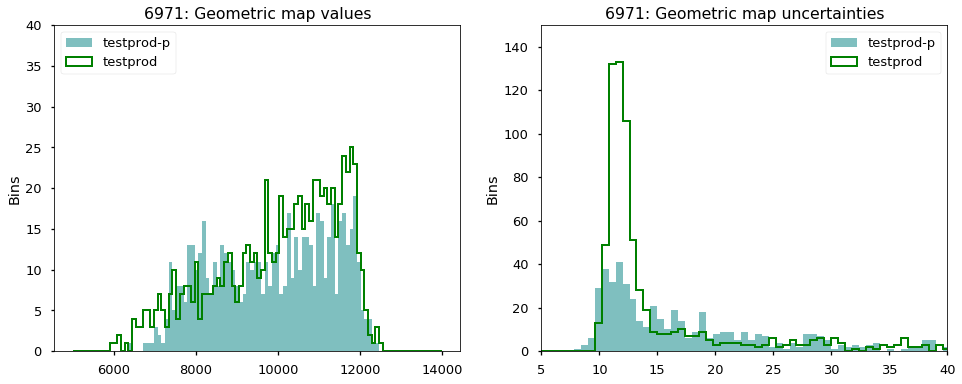

In [111]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.hist(factor_testprodp, 100, (5000, 14000), color='teal', label='testprod-p', alpha=0.5);
plt.title('{0}: Geometric map values'.format(run_number));
plt.ylabel('Bins');
plt.ylim(0, 40);
plt.hist(factor_testprod, 100, (5000, 14000), color='green', histtype='step', linewidth=2, label='testprod');
plt.legend(loc='upper left')

plt.subplot(1,2,2);
plt.hist(factor_testprodp_err, 100, (0, 60), color='teal', label='testprod-p', alpha=0.5);
plt.title('{0}: Geometric map uncertainties'.format(run_number));
plt.ylabel('Bins');
plt.ylim(0,150);
plt.xlim(5, 40);
plt.hist(factor_testprod_err, 100, (0, 60), histtype='step', linewidth=2, color='green', label='testprod');
plt.legend(loc='upper right');

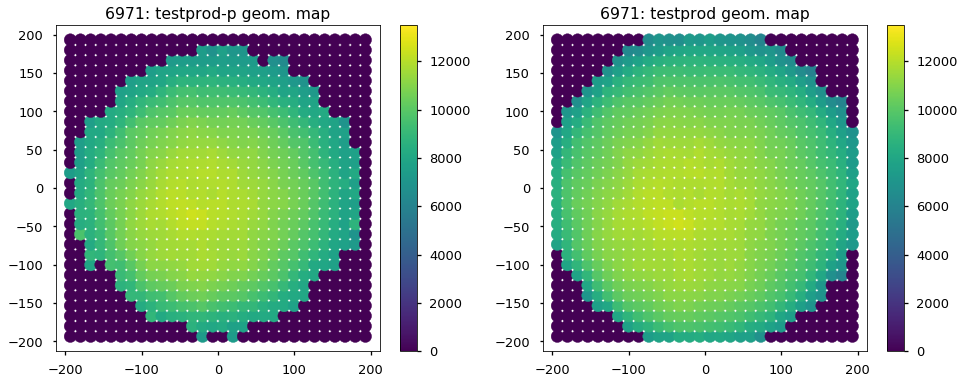

In [112]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.title('{0}: testprod-p geom. map'.format(run_number));
plt.scatter(x_axis, y_axis, c=factor_testprodp, s=150)
plt.colorbar();
plt.clim(0,13500)

plt.subplot(1,2,2);
plt.title('{0}: testprod geom. map'.format(run_number));
plt.scatter(x_axis, y_axis, c=factor_testprod, s=150)
plt.colorbar();
plt.clim(0,13500)

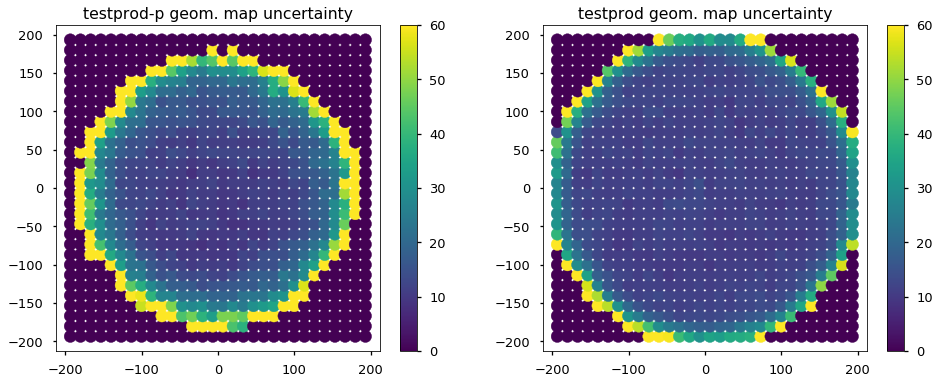

In [113]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.title('testprod-p geom. map uncertainty');
plt.scatter(x_axis, y_axis, c=factor_testprodp_err, s=150)
plt.clim(0,60)
plt.colorbar();

plt.subplot(1,2,2);
plt.title('testprod geom. map uncertainty');
plt.scatter(x_axis, y_axis, c=factor_testprod_err, s=150)
plt.clim(0,60)
plt.colorbar();

In [114]:
ratio_geo        = factor_testprodp/factor_testprod
errors_ratio_geo = factor_testprodp_err/factor_testprod_err
ratio_err_geo    = np.sqrt(pow(factor_testprodp_err/factor_testprod, 2)+pow(factor_testprod_err*factor_testprodp/factor_testprod/factor_testprod,2))

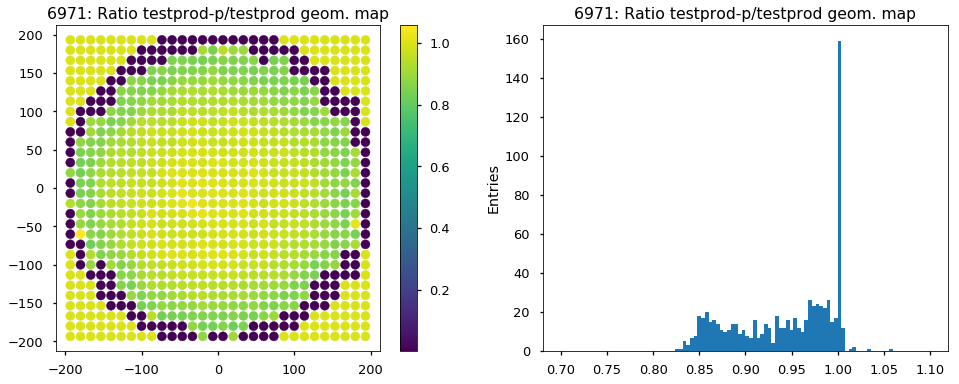

In [79]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.title('{0}: Ratio testprod-p/testprod geom. map'.format(run_number));
plt.scatter(x_axis, y_axis, c=ratio_geo)
#plt.gray()
plt.colorbar();
plt.subplot(1,2,2);
plt.title('{0}: Ratio testprod-p/testprod geom. map'.format(run_number));
plt.ylabel('Entries');
plt.hist(ratio_geo, 100, (0.7, 1.1));
#plt.yscale('log');
#plt.xlim(0.8, 1.1);

We select R<180 mm as the fiducial region

In [80]:
fiducial_cut = 180

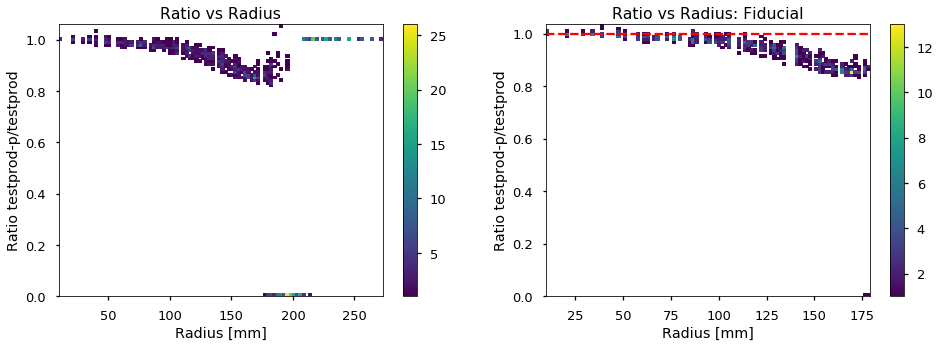

In [81]:
plt.figure(figsize=(16,5));
plt.subplot(1,2,1);
plt.title('Ratio vs Radius');
plt.hist2d(rad, ratio_geo, 100, cmin=1);
plt.colorbar();
plt.xlabel('Radius [mm]');
plt.ylabel('Ratio testprod-p/testprod');

plt.subplot(1,2,2);
plt.title('Ratio vs Radius: Fiducial');
plt.hist2d(rad[rad<fiducial_cut], ratio_geo[rad<fiducial_cut], 100, cmin=1);
plt.colorbar();
plt.xlabel('Radius [mm]');
plt.ylabel('Ratio testprod-p/testprod');
plt.axhline(y=1, color='red', linestyle='--');

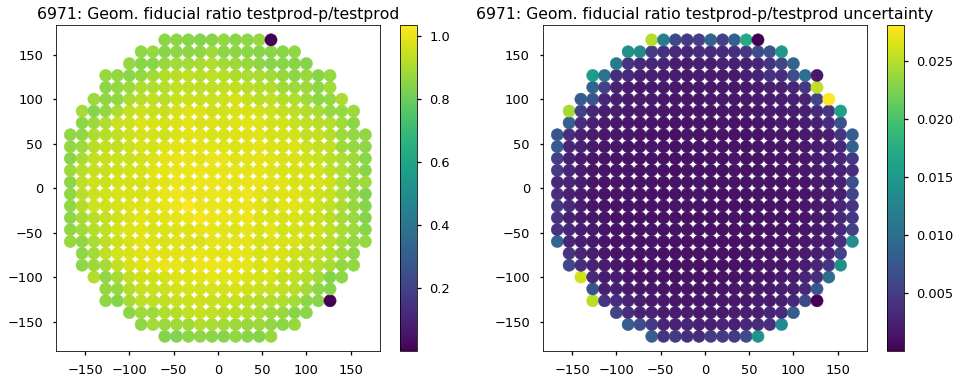

In [82]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.title('{0}: Geom. fiducial ratio testprod-p/testprod'. format(run_number));
plt.scatter(x_axis[rad<fiducial_cut].values, y_axis[rad<fiducial_cut].values, c=ratio_geo[rad<fiducial_cut].values, s=150)
plt.colorbar();

plt.subplot(1,2,2);
plt.title('{0}: Geom. fiducial ratio testprod-p/testprod uncertainty'. format(run_number));
plt.scatter(x_axis[rad<fiducial_cut].values, y_axis[rad<fiducial_cut].values, c=ratio_err_geo[rad<fiducial_cut].values, s=150)
plt.colorbar();

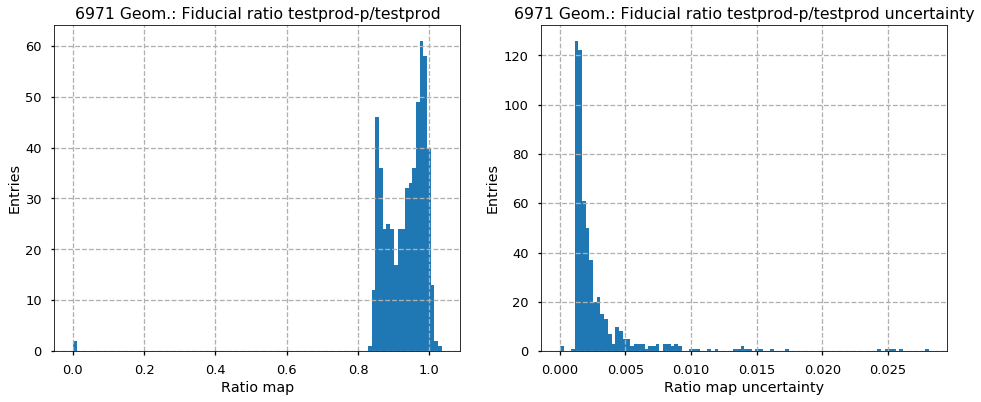

In [83]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.title('{0} Geom.: Fiducial ratio testprod-p/testprod'.format(run_number));
plt.hist(ratio_geo[rad<fiducial_cut], 100);
plt.ylabel('Entries');
plt.xlabel('Ratio map');
plt.grid(True, linestyle='--');

plt.subplot(1,2,2);
plt.title('{0} Geom.: Fiducial ratio testprod-p/testprod uncertainty'.format(run_number));
plt.hist(ratio_err_geo[rad<fiducial_cut], 100);
plt.ylabel('Entries');
plt.xlabel('Ratio map uncertainty');
plt.grid(True, linestyle='--');

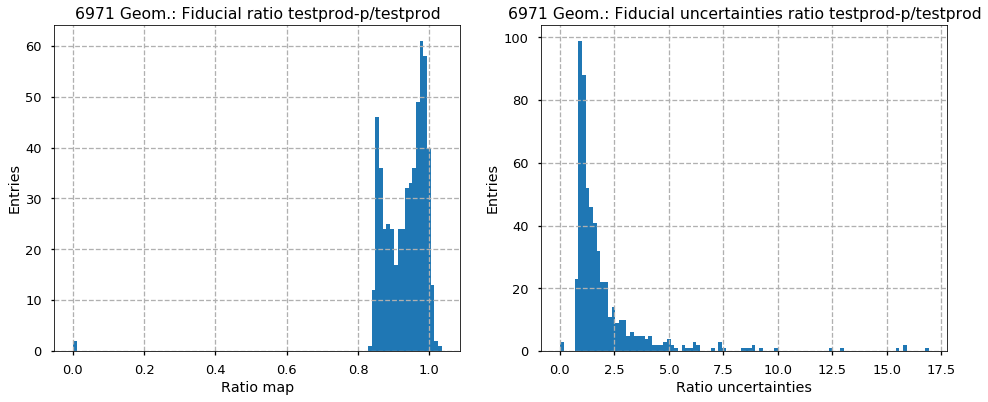

In [84]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.title('{0} Geom.: Fiducial ratio testprod-p/testprod'.format(run_number));
plt.hist(ratio_geo[rad<fiducial_cut], 100);
plt.ylabel('Entries');
plt.xlabel('Ratio map');
plt.grid(True, linestyle='--');

plt.subplot(1,2,2);
plt.title('{0} Geom.: Fiducial uncertainties ratio testprod-p/testprod'.format(run_number));
plt.hist(errors_ratio_geo[rad<fiducial_cut], 100);
plt.ylabel('Entries');
plt.xlabel('Ratio uncertainties');
plt.grid(True, linestyle='--');

In [85]:
def gauss(x, mu1, sigma1, N1):
    return N1*np.exp((-(x-mu1)**2)/(2*sigma1**2))

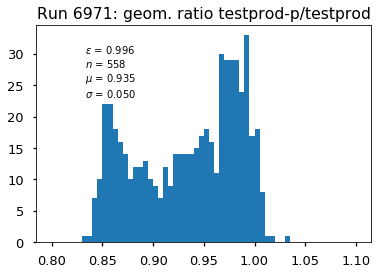

In [87]:
y_total, x_total, _ = hst.hist(ratio_geo[rad<180], 60, (0.8, 1.1));

f = fitf.fit(gauss, x_total, y_total, (1, 0.003, 100))
chi2 = f[3]

xx = np.linspace(0.98, 1.02, 60)
yy = gauss(xx, *f[1])
#plt.plot(xx, yy, color='red');
plt.title('Run {0}: geom. ratio testprod-p/testprod'.format(run_number));

#print('mean:', f[1][0], '+-', f[2][0])
#print('sigma:', f[1][1], '+-', f[2][1])

#### Pull

In [88]:
ratio_geo        = factor_testprodp-factor_testprod
errors_ratio_geo = np.sqrt((factor_testprodp_err**2)+(factor_testprod_err)**2)
pull = ratio_geo/errors_ratio_geo

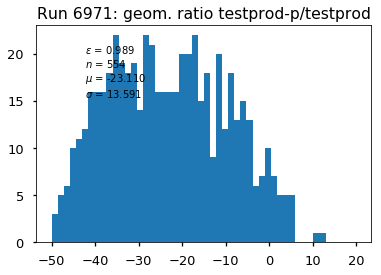

In [89]:
y_total, x_total, _ = hst.hist(pull[rad<180], 50, (-50, 20));

f = fitf.fit(gauss, x_total, y_total, (0, 1.5, 60))
chi2 = f[3]

xx = np.linspace(-5, 5, 60)
yy = gauss(xx, *f[1])
#plt.plot(xx, yy, color='red');
plt.title('Run {0}: geom. ratio testprod-p/testprod'.format(run_number));

#print('mean:', f[1][0], '+-', f[2][0])
#print('sigma:', f[1][1], '+-', f[2][1])

### Lifetime map

testprd-p

In [115]:
corrections_testprodp_file = '/home/ausonandres/maps_analysis/Kr_lt/6971_testprod-p_/corrections_run{0}_testprod-p.h5'.format(run_number)
print(corrections_testprodp_file)
dst  = dstio.load_dst(corrections_testprodp_file, group = "XYcorrections", node = "Elifetime")
x_axis = dst.x
y_axis = dst.y
rad = np.sqrt(pow(x_axis,2)+pow(y_axis,2))

factor_testprodp = dst.factor
factor_testprodp[dst.factor==dst.factor[0]] = 1

factor_testprodp_err = dst.uncertainty
factor_testprodp_err[dst.uncertainty==dst.uncertainty[0]] = 1

/home/ausonandres/maps_analysis/Kr_lt/6971_testprod-p_/corrections_run6971_testprod-p.h5


/home/ausonandres/miniconda3/envs/IC-3.7-2018-11-07/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ausonandres/miniconda3/envs/IC-3.7-2018-11-07/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


testprod

In [116]:
corrections_testprod_file = '/home/ausonandres/maps_analysis/Kr_lt/6971_testprod_/corrections_run{0}_testprod.h5'.format(run_number)
print(corrections_testprod_file)
dst  = dstio.load_dst(corrections_testprod_file, group = "XYcorrections", node = "Elifetime")
x_axis = dst.x
y_axis = dst.y
rad = np.sqrt(pow(x_axis,2)+pow(y_axis,2))

factor_testprod = dst.factor
factor_testprod[dst.factor==dst.factor[0]] = 1

factor_testprod_err = dst.uncertainty
factor_testprod_err[dst.uncertainty==dst.uncertainty[0]] = 1

/home/ausonandres/maps_analysis/Kr_lt/6971_testprod_/corrections_run6971_testprod.h5


/home/ausonandres/miniconda3/envs/IC-3.7-2018-11-07/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ausonandres/miniconda3/envs/IC-3.7-2018-11-07/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


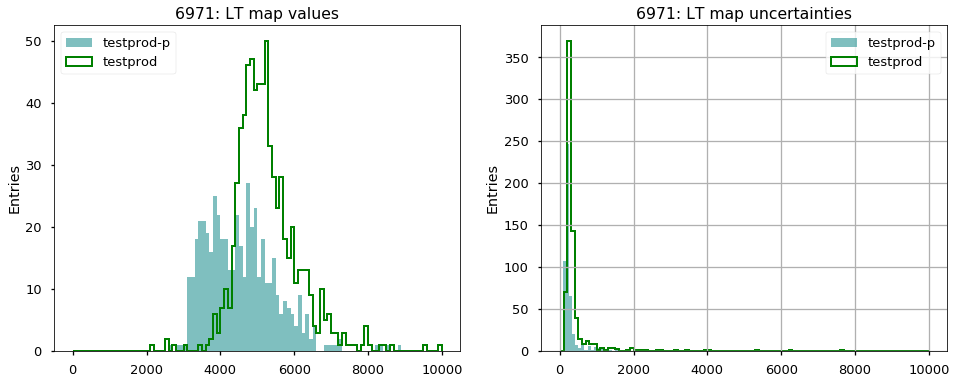

In [117]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.hist(factor_testprodp, 100, (4,10000), color='teal', label='testprod-p', alpha=0.5);
plt.title('{0}: LT map values'.format(run_number));
plt.hist(factor_testprod, 100, (4,10000), color='green', histtype='step', linewidth=2, label='testprod');
plt.ylabel('Entries');
plt.legend(loc='upper left')

plt.subplot(1,2,2);
plt.hist(factor_testprodp_err, 120, (4,10000), color='teal', label='testprod-p', alpha=0.5);
plt.title('{0}: LT map uncertainties'.format(run_number));
plt.ylabel('Entries');
plt.grid(True)
plt.hist(factor_testprod_err, 100, (4,10000), color='green', histtype='step', linewidth=2, label='testprod');
plt.legend(loc='upper right');

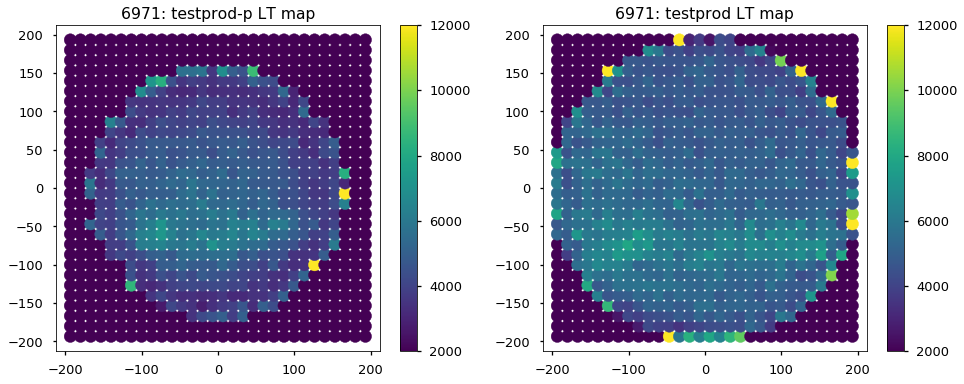

In [118]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.title('{0}: testprod-p LT map'.format(run_number));
plt.scatter(x_axis, y_axis, c=factor_testprodp, s=150)
plt.colorbar();
plt.clim(2000,12000)

plt.subplot(1,2,2);
plt.title('{0}: testprod LT map'.format(run_number));
plt.scatter(x_axis, y_axis, c=factor_testprod, s=150)
plt.colorbar();
plt.clim(2000,12000)

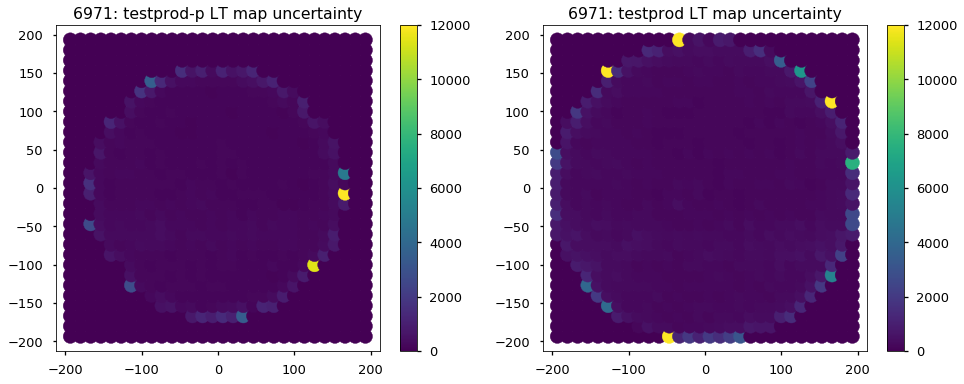

In [119]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.title('{0}: testprod-p LT map uncertainty'.format(run_number));
plt.scatter(x_axis, y_axis, c=factor_testprodp_err, s=200)
plt.colorbar();
plt.clim(0,12000)

plt.subplot(1,2,2);
plt.title('{0}: testprod LT map uncertainty'.format(run_number));
plt.scatter(x_axis, y_axis, c=factor_testprod_err, s=200)
plt.colorbar();
plt.clim(0,12000)

In [120]:
ratio_lt        = factor_testprodp/factor_testprod
errors_ratio_lt = factor_testprodp_err/factor_testprod_err
ratio_err_lt    = np.sqrt(pow(factor_testprodp_err/factor_testprod, 2)+pow(factor_testprod_err*factor_testprodp/factor_testprod/factor_testprod,2))

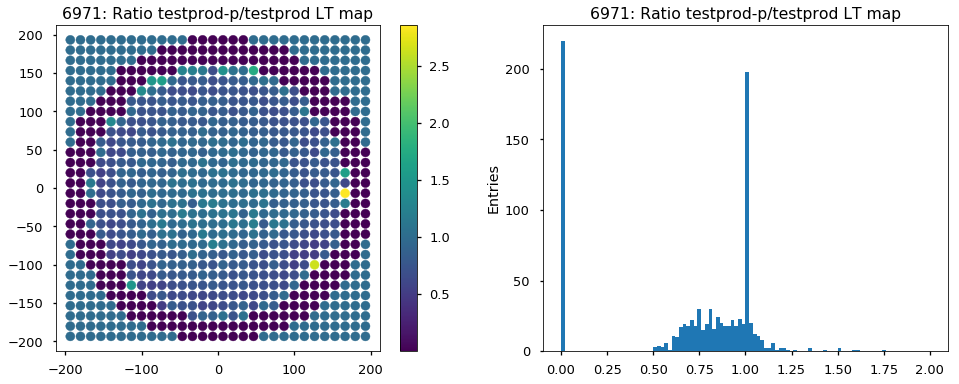

In [121]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.title('{0}: Ratio testprod-p/testprod LT map'.format(run_number));
plt.scatter(x_axis[(ratio_lt>-100)&(ratio_lt<50)], y_axis[(ratio_lt>-100)&(ratio_lt<50)], c=ratio_lt[(ratio_lt>-100)&(ratio_lt<50)])
plt.colorbar();

plt.subplot(1,2,2);
plt.title('{0}: Ratio testprod-p/testprod LT map'.format(run_number));
plt.ylabel('Entries');
plt.hist(ratio_lt[(ratio_lt>0)&(ratio_lt<50)], 100, (0,2));

In [122]:
fiducial_cut = 180

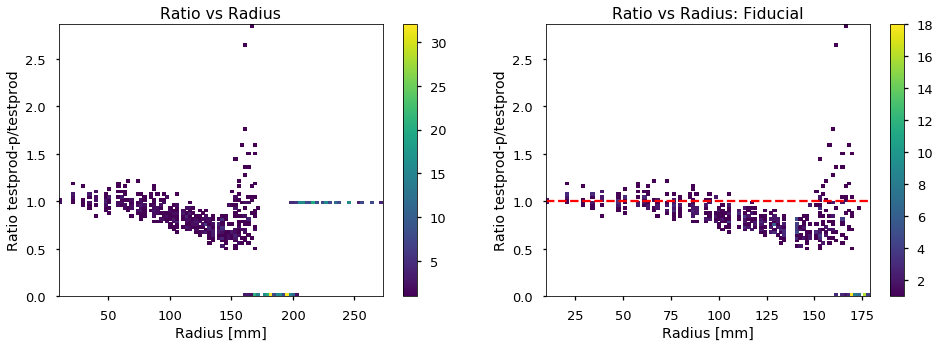

In [98]:
plt.figure(figsize=(16,5));
plt.subplot(1,2,1);
plt.title('Ratio vs Radius');
plt.hist2d(rad[ratio_lt<10], ratio_lt[ratio_lt<10], 100, cmin=1);
plt.colorbar();
plt.xlabel('Radius [mm]');
plt.ylabel('Ratio testprod-p/testprod');

plt.subplot(1,2,2);
plt.title('Ratio vs Radius: Fiducial');
plt.hist2d(rad[rad<fiducial_cut], ratio_lt[rad<fiducial_cut], 100, cmin=1);
plt.colorbar();
plt.xlabel('Radius [mm]');
plt.ylabel('Ratio testprod-p/testprod');
plt.axhline(y=1, color='red', linestyle='--');

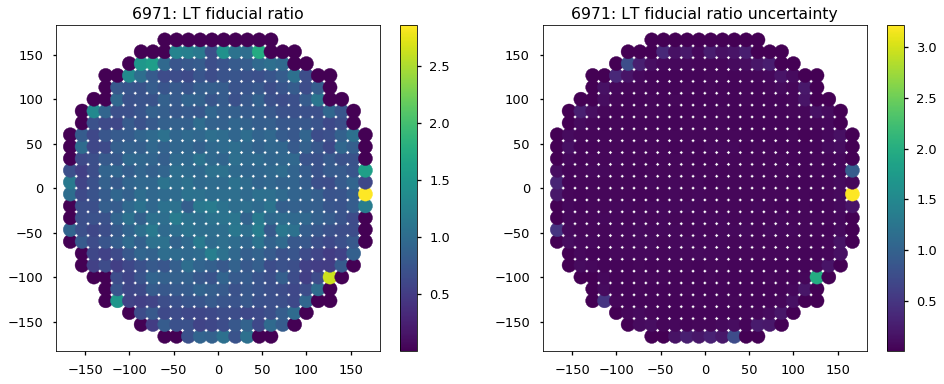

In [99]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.title('{0}: LT fiducial ratio'. format(run_number));
plt.scatter(x_axis[rad<fiducial_cut].values, y_axis[rad<fiducial_cut].values, c=ratio_lt[rad<fiducial_cut].values, s=200)
plt.colorbar();

plt.subplot(1,2,2);
plt.title('{0}: LT fiducial ratio uncertainty'. format(run_number));
plt.scatter(x_axis[rad<fiducial_cut].values, y_axis[rad<fiducial_cut].values, c=ratio_err_lt[rad<fiducial_cut].values, s=200)
plt.colorbar();

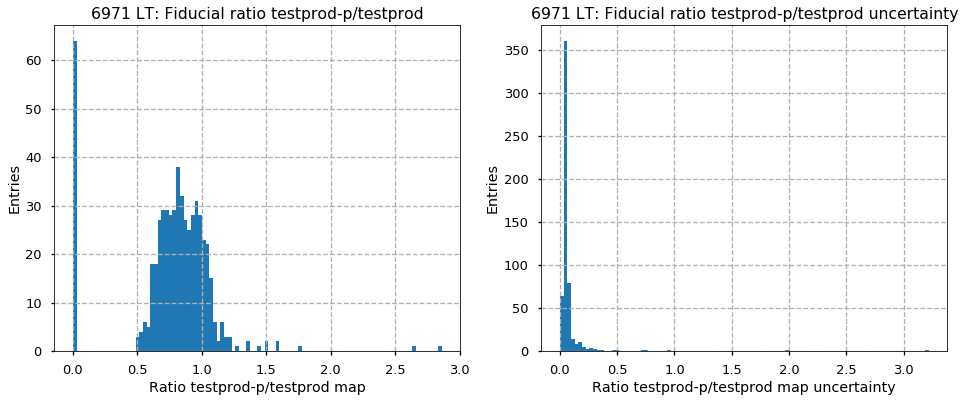

In [100]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.title('{0} LT: Fiducial ratio testprod-p/testprod'.format(run_number));
plt.hist(ratio_lt[rad<fiducial_cut], 100);
plt.ylabel('Entries');
plt.xlabel('Ratio testprod-p/testprod map');
plt.grid(True, linestyle='--');

plt.subplot(1,2,2);
plt.title('{0} LT: Fiducial ratio testprod-p/testprod uncertainty'.format(run_number));
plt.hist(ratio_err_lt[rad<fiducial_cut], 100);
plt.ylabel('Entries');
plt.xlabel('Ratio testprod-p/testprod map uncertainty');
plt.grid(True, linestyle='--');

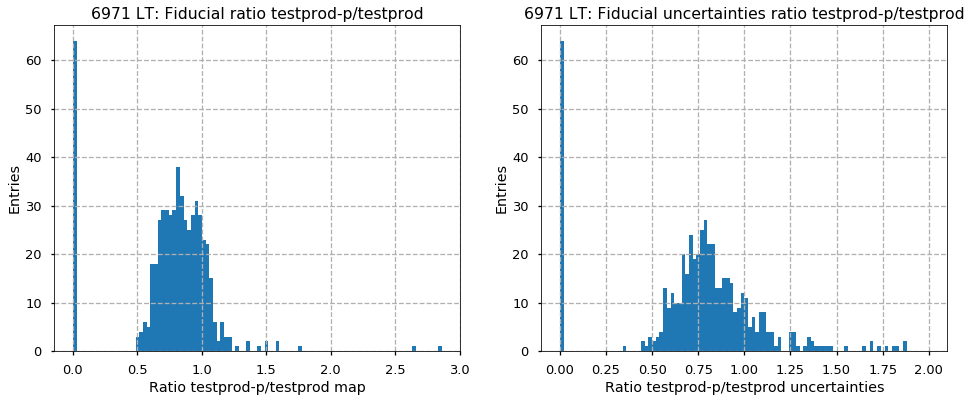

In [101]:
plt.figure(figsize=(16,6));
plt.subplot(1,2,1);
plt.title('{0} LT: Fiducial ratio testprod-p/testprod'.format(run_number));
plt.hist(ratio_lt[rad<fiducial_cut], 100);
plt.ylabel('Entries');
plt.xlabel('Ratio testprod-p/testprod map');
plt.grid(True, linestyle='--');

plt.subplot(1,2,2);
plt.title('{0} LT: Fiducial uncertainties ratio testprod-p/testprod'.format(run_number));
plt.hist(errors_ratio_lt[rad<fiducial_cut], 100, (0,2));
plt.ylabel('Entries');
plt.xlabel('Ratio testprod-p/testprod uncertainties');
plt.grid(True, linestyle='--');

In [102]:
def gauss(x, mu1, sigma1, N1):
    return N1*np.exp((-(x-mu1)**2)/(2*sigma1**2))

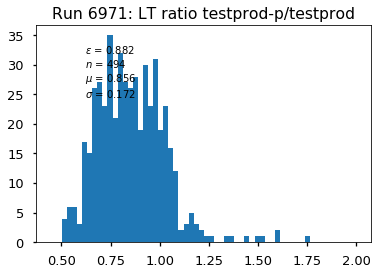

In [104]:
y_total, x_total, _ = hst.hist(ratio_lt[rad<180], 60, (0.45, 2));

f = fitf.fit(gauss, x_total, y_total, (1, 0.05, 80))
chi2 = f[3]

xx = np.linspace(0.6, 1.4, 100)
yy = gauss(xx, *f[1])
#plt.plot(xx, yy, color='red');
plt.title('Run {0}: LT ratio testprod-p/testprod'.format(run_number));

#print('mean:', f[1][0], '+-', f[2][0])
#print('sigma:', f[1][1], '+-', f[2][1])

#### Pull

In [105]:
ratio_lt        = factor_testprodp-factor_testprod
errors_ratio_lt = np.sqrt((factor_testprodp_err**2)+(factor_testprod_err)**2)
pull = ratio_lt/errors_ratio_lt

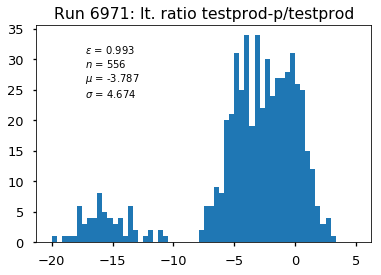

In [107]:
import invisible_cities.core.fit_functions  as fitf
y_total, x_total, _ = hst.hist(pull[rad<180], 60, (-20, 5));

f = fitf.fit(gauss, x_total, y_total, (0, 0.5, 120))
chi2 = f[3]

xx = np.linspace(-5, 5, 60)
yy = gauss(xx, *f[1])
#plt.plot(xx, yy, color='red');
plt.title('Run {0}: lt. ratio testprod-p/testprod'.format(run_number));

#print('mean:', f[1][0], '+-', f[2][0])
#print('sigma:', f[1][1], '+-', f[2][1])

#### Ratio comparison

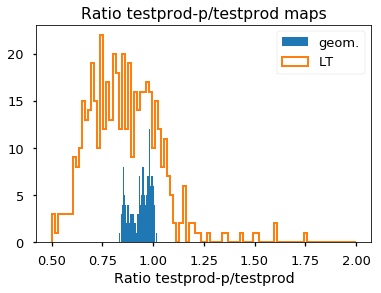

In [123]:
plt.hist(ratio_geo[rad<180], 1000, (0.5, 2), label='geom.', );
plt.hist(ratio_lt[rad<180], 100, (0.5, 2), label='LT', histtype='step', linewidth='2');
plt.title('Ratio testprod-p/testprod maps');
plt.xlabel('Ratio testprod-p/testprod');
plt.legend();

Conclusion: significant difference in the X-Y distributions and in the correction maps between both parameter values